# Final Project - A Data Cookbook    By: Angel N Baikakedi

Sources: Class Activity Notebooks as well as Our World in Data for the datasets. \
Dataset links: https://ourworldindata.org/grapher/human-development-index, \
https://ourworldindata.org/grapher/share-of-women-in-parliament \
Seaborn Handbook: https://seaborn.pydata.org/tutorial/introduction.html

For this project, I decided to look at the share of women in parliament and human development index (HDI) datasets. There is no particular reason for this choice besides the fact that I had proposed to work with these datasets in the final project for my Environmental Economics class.

For the sake of being thorough, I will provide descriptions to the data;
Our World in Data defines the HDI as a summary measure of key dimensions of human development: a long and healthy life, a good education, and a decent standard of living. Higher values indicate higher human development. This data was collected between the years 1990 and 2021.
The share of women in parliament is the percentage of seats in lower or single chamber of the legislature held by women, collected between the years 1900 and 2022.

There are four recipes I would like to record in my cookbook, namely:
1) Merging datasets
2) Finding maximum and minimum values
3) Filtering on conditions to create new datasets
4) Plotting data

I believe that these are the main recipes that I will need throughout my career, as I hope to continue working with data in the future whether it's for individual research or for my jobs. Most times, raw data needs to be cleaned and visualized, hence my choices in recipes. I also enjoyed using these recipes for Project 9 and witnessed different ways they could be utilized.

As part of the assignment requirement, I will use the fourth recipe (Plotting data) as an exhibition of how to do one thing in two different ways.

In [1]:
#importing the packages we will need and loading our data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
hdi_data= pd.read_csv("hdi.csv")
parliament_data = pd.read_csv("women_in_parliament.csv")

# Recipe I: Merging Data

The code below is merging two dataframes, hdi_data and parliament_data, based on the sharedcolumns 'Entity', 'Code', and 'Year' using an inner join. So, the merged dataframe will contain only the rows where the values in the 'Entity', 'Code', and 'Year' columns are present in both datasets.

In [3]:
merged_df = hdi_data.merge(parliament_data, on=['Entity','Code', 'Year'], how='inner')

In [4]:
merged_df

,Entity,Code,Year,Human Development Index,wom_parl_vdem_owid
0,Afghanistan,AFG,1990,0.273,3.70
1,Afghanistan,AFG,1991,0.279,3.70
2,Afghanistan,AFG,2005,0.400,27.31
3,Afghanistan,AFG,2006,0.409,27.31
4,Afghanistan,AFG,2007,0.424,27.69
...,...,...,...,...,...
4941,Zimbabwe,ZWE,2017,0.594,32.58
4942,Zimbabwe,ZWE,2018,0.602,31.85
4943,Zimbabwe,ZWE,2019,0.601,31.85
4944,Zimbabwe,ZWE,2020,0.600,31.85


# Recipe II: Finding maximum & minimum values

For this recipe, and examples sake, I want to find the country with the maximum HDI and share of women in parliament, as well as the country with the minimum HDI and share of women in parliament to find any correspondence between development and seats held by women.

The code below returns the index of the first occurrence of the maximum and minimum values in the HDI and women_owid columns. The "merged_df.loc[]" is used to access a group of rows and columns by labels or a boolean array. In this case, it retrieves the rows in merged_df where the index corresponds to the index of the maximum/minimum value in the specified columns.

In [5]:
highest_HDI = merged_df.loc[merged_df['Human Development Index'].idxmax()]
highest_HDI

Entity                     Norway
Code                          NOR
Year                         2018
Human Development Index     0.962
wom_parl_vdem_owid          40.83
Name: 3355, dtype: object

In [6]:
highest_women_in_parliament = merged_df.loc[merged_df['wom_parl_vdem_owid'].idxmax()]
highest_women_in_parliament 

Entity                     Rwanda
Code                          RWA
Year                         2013
Human Development Index     0.508
wom_parl_vdem_owid          63.75
Name: 3726, dtype: object

Now the process is repeated for minimum values. The code is the same as the one above and carries out the same job, except this time max will be replaced with 'min.'

In [7]:
lowest_HDI = merged_df.loc[merged_df['Human Development Index'].idxmin()]
lowest_HDI

Entity                     Niger
Code                         NER
Year                        1990
Human Development Index    0.216
wom_parl_vdem_owid           5.4
Name: 3252, dtype: object

In [8]:
lowest_women_in_parliament = merged_df.loc[merged_df['wom_parl_vdem_owid'].idxmin()]
lowest_women_in_parliament 

Entity                     Bahrain
Code                           BHR
Year                          1992
Human Development Index      0.749
wom_parl_vdem_owid             0.0
Name: 259, dtype: object

# Recipe III: Filtering for New Dataframes

For this recipe and examples sake, I would like to create two new dataframes. One will dataframe will filter for records with an HDI of <0.550 from the most recent records (2021). The other will filter for records with an HDI <0.550 from our earliest data (1990). The reason I chose that HDI value is because that's what the United Nations Development Program (UNDP) classifies as a developing country, thus I would like to compare the statistics and plot the data for my next recipe. 

The code below filters the merged_df dataframe and creates two new dataframes, merged_df_90 and merged_df_21, containing only the rows where the value in the 'Year' column is equal to 1990 and 2021 respectively, as well as where the 'Human Development Index' is less than 0.550. 

In [9]:
merged_df_90 = merged_df.loc[(merged_df['Human Development Index'] <0.550) & (merged_df['Year'] == 1990)]
merged_df_90 #displays the dataframe

,Entity,Code,Year,Human Development Index,wom_parl_vdem_owid
0,Afghanistan,AFG,1990,0.273,3.700
289,Bangladesh,BGD,1990,0.397,10.300
654,Cambodia,KHM,1990,0.378,21.400
686,Cameroon,CMR,1990,0.452,14.400
772,Central African Republic,CAF,1990,0.338,3.800
857,China,CHN,1990,0.484,21.300
939,Congo,COG,1990,0.522,14.300
1002,Cote d'Ivoire,CIV,1990,0.427,4.571
1155,Democratic Republic of Congo,COD,1990,0.386,5.400
1345,El Salvador,SLV,1990,0.525,11.700


In [10]:
merged_df_21 = merged_df.loc[(merged_df['Human Development Index'] <0.550) & (merged_df['Year'] == 2021)]
merged_df_21

,Entity,Code,Year,Human Development Index,wom_parl_vdem_owid
18,Afghanistan,AFG,2021,0.478,27.02
439,Benin,BEN,2021,0.525,8.43
624,Burkina Faso,BFA,2021,0.449,6.30
653,Burundi,BDI,2021,0.426,38.21
802,Central African Republic,CAF,2021,0.404,12.86
824,Chad,TCD,2021,0.394,15.43
1175,Democratic Republic of Congo,COD,2021,0.479,12.80
1234,Djibouti,DJI,2021,0.509,26.15
1484,Ethiopia,ETH,2021,0.498,42.59
1629,Gambia,GMB,2021,0.500,8.62


I also want to describe the data to gain and understanding of it. 
Thus, the code below generates descriptive statistics of the dataframes. The describe() method  provides summary statistics of the numerical columns in the dataframes.

In [11]:
merged_df_90.describe()

,Year,Human Development Index,wom_parl_vdem_owid
count,41.0,41.000000,41.000000
mean,1990.0,0.415122,9.188439
std,0.0,0.087028,7.109868
min,1990.0,0.216000,0.000000
25%,1990.0,0.371000,3.896000
50%,1990.0,0.412000,7.800000
75%,1990.0,0.484000,12.400000
max,1990.0,0.545000,36.900000


In [12]:
merged_df_21.describe()

,Year,Human Development Index,wom_parl_vdem_owid
count,30.0,30.000000,30.000000
mean,2021.0,0.482700,22.183000
std,0.0,0.048242,14.426974
min,2021.0,0.385000,0.000000
25%,2021.0,0.450500,12.447500
50%,2021.0,0.490500,19.430000
75%,2021.0,0.522250,32.115000
max,2021.0,0.549000,61.250000


# Recipe IV: Plotting Data

This recipe plots the filtered data from the above recipe. Since the data is similar besides the years, I will use section to show two different ways to visualize it as an attempt to fulfill the requirement of having one recipe accomplishing the same task (visualization) in different ways.

For the first visualization, I will use a scatterplot. 
The code below uses the relplot function from the Seaborn library to create a scatter plot to visualize the relationship between two variables: "Human Development Index" on the x-axis and "wom_parl_vdem_owid" on the y-axis. The data used for plotting is from the dataframes merged_df_90 and merged_df_21.
The transparency of the points is adjusted with alpha, and the aspect ratio and height of each subplot are controlled with aspect and height, respectively.

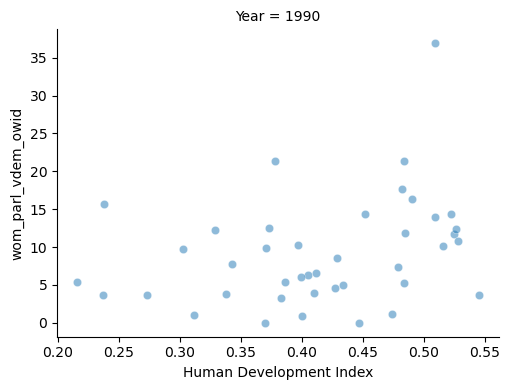

In [13]:
sns.relplot(
    data=merged_df_90,
    x="Human Development Index", y="wom_parl_vdem_owid",
    col="Year", alpha = 0.5, aspect=1.3, height=4
)

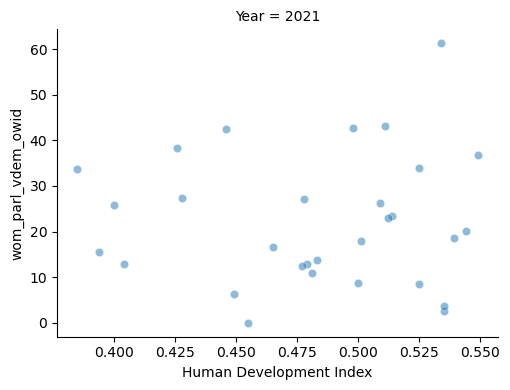

In [14]:
sns.relplot(
    data=merged_df_21,
    x="Human Development Index", y="wom_parl_vdem_owid",
    col="Year", alpha = 0.5, aspect=1.3, height=4
)

I would also like to introduce a linear regression to the scatterplot for statistical purposes.

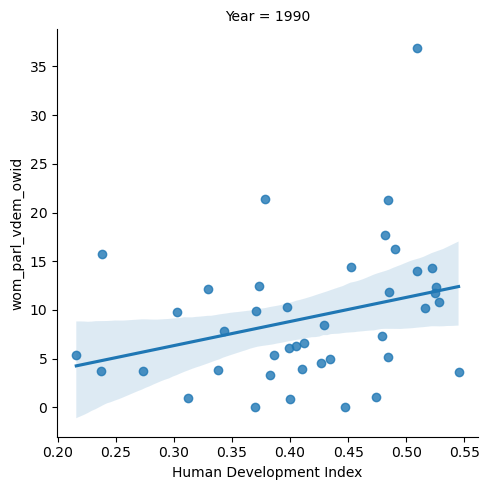

In [15]:
sns.lmplot(data=merged_df_90, x="Human Development Index", y="wom_parl_vdem_owid", col="Year")

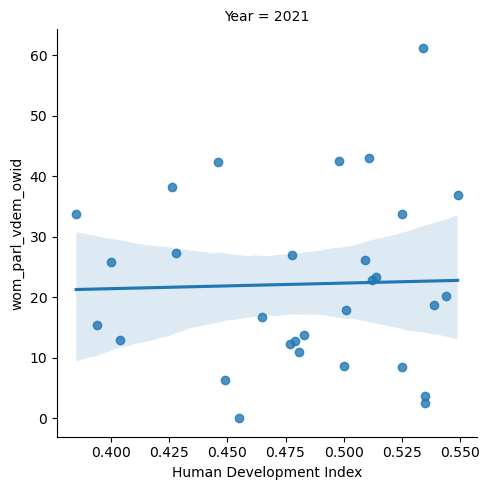

In [16]:
sns.lmplot(data=merged_df_21, x="Human Development Index", y="wom_parl_vdem_owid", col="Year")

The code above uses Seaborn's lmplot to create a set of scatter plots with linear regression lines. It is useful for exploring the correlation and trend between the HDI and share of women in parliament.

As a final visualization, I want to display the distributions of HDI and women in parliament for both years.
The code below uses Seaborn's displot function to create a histogram and a kernel density estimate (KDE) plot for the "Human Development Index" column in the merged_df_90 and merged_df_21 dataframes. 

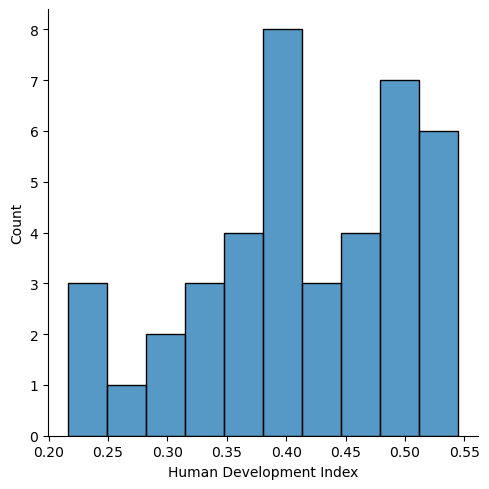

In [17]:
#HDI distribution for the year 1990
sns.displot(merged_df_90, x="Human Development Index", bins=10)

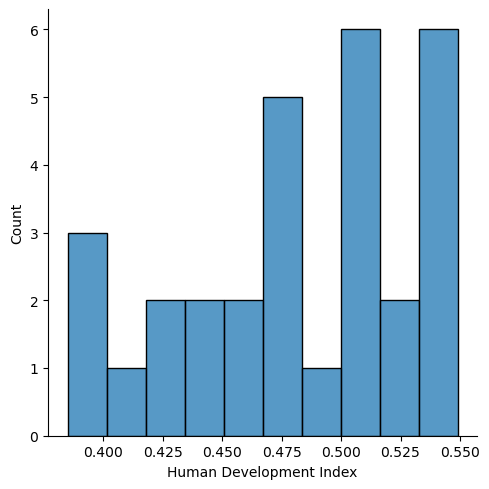

In [18]:
#HDI distribution for the year 2021
sns.displot(merged_df_21, x="Human Development Index", bins=10)

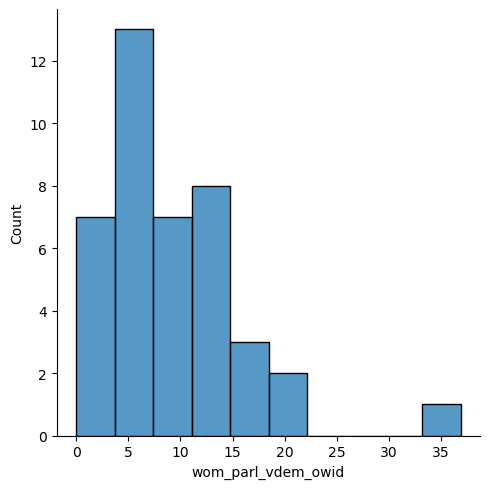

In [19]:
#share of women in parliament distribution for the year 1990
sns.displot(merged_df_90, x="wom_parl_vdem_owid", bins=10)

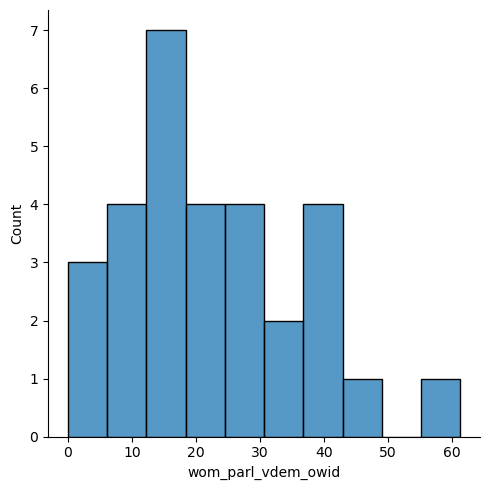

In [20]:
#share of women in parliament distribution for the year 1990
sns.displot(merged_df_21, x="wom_parl_vdem_owid", bins=10)

Overall, I'd like to emphasize that although these skills displayed are useful, they are not the only skills that I've picked up from the class; but those that I frequent often and anticipate to frequent in the future.